# I-Data Preprocessing

In [321]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [322]:
#Import the dataset
df=pd.read_csv('OnlineRetail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [323]:
#Find the shape of the dataset
df.shape

(541909, 8)

In [324]:
#Get the information of 
the dataset
df.info()

SyntaxError: invalid syntax (<ipython-input-324-b13817172049>, line 2)

**Insight:**
 - There are 541908 rows and 8 columns
 - There are no missing values
 - Data types: There are 5 objects,1 int64 and 2 float64

In [325]:
#Describe the dataset
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


**Insight:**
Among 38 country customers from the United Kingdom are the most frequent.


**Insight:**
There are 541909 rows and 8 columns


In [326]:
#number of Customers per country
#1drop duplicates
customers_per_country=df[['Country','CustomerID']].drop_duplicates()
customers_per_country


,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0
...,...,...
536969,United Kingdom,13436.0
537255,United Kingdom,15520.0
538064,United Kingdom,13298.0
538812,United Kingdom,14569.0


In [327]:
customers_per_country.shape

(4389, 2)

In [328]:
#count number of customers for each country
no_cst_country=customers_per_country.groupby('Country').count()[['CustomerID']].sort_values('CustomerID',ascending=False).rename(columns={'CustomerID':'No of customers per country'}).reset_index()
no_cst_country

,Country,No of customers per country
0,United Kingdom,3950
1,Germany,95
2,France,87
3,Spain,31
4,Belgium,25
5,Switzerland,21
6,Portugal,19
7,Italy,15
8,Finland,12
9,Austria,11


**Insight:**
The United Kingdom has the highest number of customers. Hong kong has 0 customers.

In [329]:
#Since most customers are from the United Kingdom we will keep only the data from the united Kingdom
df=df.query("Country=='United Kingdom'")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom


In [330]:
#Check missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [331]:
df['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'CREAM HANGING HEART T-LIGHT HOLDER',
       "BLACK SIL'T SQU CANDLE PLATE ", 'PAPER CRAFT , LITTLE BIRDIE'],
      dtype=object)

In [332]:
#Remove missing values from CustomerID, We can keep the missing values in thye Description column since It has no direct impact on our dataset
df=df[pd.notnull(df["CustomerID"])]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom


In [333]:
#Check if the CustomerID missing values are dropped
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [334]:
#Checking if there are any negative values in the quantity column
df[df.Quantity<0]['Quantity']

141       -1
154       -1
235      -12
236      -24
237      -24
          ..
540449   -11
541541    -1
541715    -5
541716    -1
541717    -5
Name: Quantity, Length: 7533, dtype: int64

- There are many negative negative value

In [335]:
df =df.drop(df[df.Quantity<0].index)

In [336]:
#Checking if there are any negative values in the UnitPrice column
df.UnitPrice.min()

0.0

 - There no negative values in the UnitPrice column

In [337]:
#Drop the row where the the quantity has a negative value
df=df.drop(df[df['Quantity']< 0].index)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom


In [338]:
#Since InvoiceDate is an object(String) I will convert it to datetime.We will use It to calculate the recency later on that is why we need to convert it
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [339]:
#Add a new column for the total amount since we are going to calculate the monetary value later on
df['Total Amount']=df['Quantity']*df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80


In [340]:
#What is the timeframe of data?
print('Orders from {} to {}'.format(df['InvoiceDate'].min(),df['InvoiceDate'].max()))

Orders from 2010-12-01 08:26:00 to 2011-12-09 12:49:00


- The time frame is from 2010-12-01 08:26:00 to 2011-12-09 12:49:00
- It is one year frame, This is the period usually used for RFM Analysis

**Data cleaning/preprocessing part is finished**


# II-Calculate Recency,Frequency and Monetary value using the lambda function

 - We are going to calculate recency, frequency and monetary value per customer

In [341]:
import datetime as dt


In [342]:
#Calculate the number of days since last purchase day
lat_date=dt.datetime(2011,12,10)

In [343]:
#RFM 
RFM = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (lat_date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Total Amount': lambda x: x.sum()})
RFM['InvoiceDate'] = RFM['InvoiceDate'].astype(int)
RFM.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Total Amount': 'Monetary'}, inplace=True)

RFM.reset_index()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4596,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34
...,...,...,...,...
3916,18280.0,277,10,180.60
3917,18281.0,180,7,80.82
3918,18282.0,7,12,178.05
3919,18283.0,3,756,2094.88


# III-Univariate analysis 

**1-Analyze the recency**

In [344]:
RFM.Recency.describe()


count    3921.000000
mean       91.722265
std        99.528532
min         0.000000
25%        17.000000
50%        50.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

`the mean of Recency is 91.32 which means the average last date was before 91 days on average.`

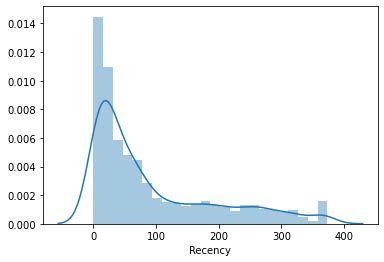

In [345]:
r = RFM['Recency']

srr = sns.distplot(r)

**Insight:**
- 1-Data is skewed to the right side,positively skewed
- 2-Most recent purchases occured between 0 and 100 days
- 3-Sales have increased in recent times



2-Analyze the Frequency

In [346]:
RFM.Frequency.describe()

count    3921.000000
mean       90.371079
std       217.796155
min         1.000000
25%        17.000000
50%        41.000000
75%        99.000000
max      7847.000000
Name: Frequency, dtype: float64

`On average customers purchased 91 times.`

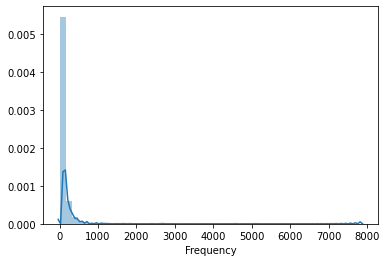

In [347]:
f = RFM['Frequency']
sff = sns.distplot(f)

**Insight:**
    Since the skeweness is to the right we have to exclude all the data above Frequency=1000

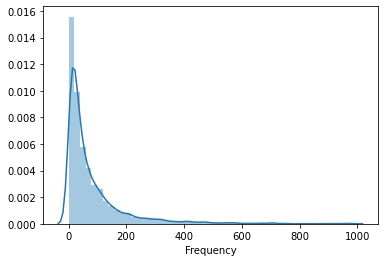

In [348]:
f = RFM.query('Frequency < 1000')['Frequency']
sff = sns.distplot(f)

`Most of the customers appeared in the store multiple times in last one year`

3-Analyze the monetary value

In [349]:
RFM.Monetary.describe()


count      3921.000000
mean       1863.910113
std        7481.922217
min           0.000000
25%         300.040000
50%         651.820000
75%        1575.890000
max      259657.300000
Name: Monetary, dtype: float64

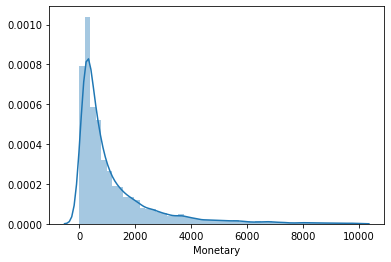

In [350]:
m =RFM.query('-1 < Monetary < 10000')['Monetary']
mff = sns.distplot(m)

# IV-Customers segmenting using quartiles

1-Calculating quartiles for Recency, Frequency and Monetary

In [351]:
RFM['r_quartile'] = pd.qcut(RFM['Recency'], 4, ['1','2','3','4'])
RFM['f_quartile'] = pd.qcut(RFM['Frequency'], 4, ['4','3','2','1'])
RFM['m_quartile'] = pd.qcut(RFM['Monetary'], 4, ['4','3','2','1'])
RFM.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


2-Combine all three quartiles in a single column to help you to segment the customers well group


In [352]:
RFM['RFM_Group'] = RFM.r_quartile.astype(str)+ RFM.f_quartile.astype(str) + RFM.m_quartile.astype(str)
RFM

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Group
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,441
12747.0,2,103,4196.01,1,1,1,111
12748.0,0,4596,33719.73,1,1,1,111
12749.0,3,199,4090.88,1,1,1,111
12820.0,3,59,942.34,1,2,2,122
...,...,...,...,...,...,...,...
18280.0,277,10,180.60,4,4,4,444
18281.0,180,7,80.82,4,4,4,444
18282.0,7,12,178.05,1,4,4,144


In [353]:
#Show total sum of RFM_Group
RFM['RFMScore'] = RFM[['r_quartile', 'f_quartile', 'm_quartile']].sum(axis = 1)
RFM


,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Group,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,441.0
12747.0,2,103,4196.01,1,1,1,111,111.0
12748.0,0,4596,33719.73,1,1,1,111,111.0
12749.0,3,199,4090.88,1,1,1,111,111.0
12820.0,3,59,942.34,1,2,2,122,122.0
...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,4,4,4,444,444.0
18281.0,180,7,80.82,4,4,4,444,444.0
18282.0,7,12,178.05,1,4,4,144,144.0


In [354]:
RFM = RFM.sort_values(by='RFMScore')
RFM.drop('RFMScore',axis =1, inplace=True)


In [355]:
RFM

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Group
CustomerID,,,,,,,
16814.0,14,324,6509.10,1,1,1,111
15214.0,1,110,1661.44,1,1,1,111
17750.0,5,193,1797.57,1,1,1,111
17744.0,3,136,2322.40,1,1,1,111
16839.0,8,266,16594.35,1,1,1,111
...,...,...,...,...,...,...,...
15178.0,260,3,40.50,4,4,4,444
13302.0,155,1,63.75,4,4,4,444
15174.0,322,11,135.75,4,4,4,444


In [356]:
def segment(x):
    if x == '111':
        return 'Loyal Customer - Platinum'
    elif x == '144':
        return 'New Customer - Bronze'
    elif x in ['311', '411']:
        return 'Potential Customer - Silver'
    else:
        return 'others'

In [357]:
RFM['Category'] = RFM['RFM_Group'].apply(segment)


In [358]:
RFM

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Group,Category
CustomerID,,,,,,,,
16814.0,14,324,6509.10,1,1,1,111,Loyal Customer - Platinum
15214.0,1,110,1661.44,1,1,1,111,Loyal Customer - Platinum
17750.0,5,193,1797.57,1,1,1,111,Loyal Customer - Platinum
17744.0,3,136,2322.40,1,1,1,111,Loyal Customer - Platinum
16839.0,8,266,16594.35,1,1,1,111,Loyal Customer - Platinum
...,...,...,...,...,...,...,...,...
15178.0,260,3,40.50,4,4,4,444,others
13302.0,155,1,63.75,4,4,4,444,others
15174.0,322,11,135.75,4,4,4,444,others
